<a href="https://colab.research.google.com/github/harini9804/big-data-assignment/blob/master/Big_Data_Assignment_Decision_Tree_and_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we shall use decision tree and bayes classifier for **classifying banknote-like specimen images into genuine or forged**. More information about this dataset is available [here](https://archive.ics.uci.edu/ml/datasets/banknote+authentication).

The file containing the dataset is ***'bill_authentication.csv'***

# Data Preprocessing

In [0]:
!pip install scikit-plot
!pip install stemgraphic
!pip install graphviz
!pip install pydotplus
!pip install statsmodels

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for stemgraphic: filename=stemgraphic-0.9.0-cp36-none-any.whl size=60656 sha256=ca3b77a93b27a019fdfeccf03c90be75658383d52a65e2a84bc4436b518e8114
  Stored in directory: /root/.cache/pip/wheels/a3/d5/2f/202796078c15874d70a86d413281851cd921dcac1787372fb2
Successfully built stemgraphic


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import stemgraphic 
import pydotplus
import statsmodels.api as sm
from sklearn.externals.six import StringIO 
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [0]:
dataset = pd.read_csv("/content/bill_authentication.csv")

## Dataset description 

Number of rows and columns in our dataset:

In [0]:
dataset.shape

(1372, 5)

Information about our dataset:

In [0]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Checking for null values:

In [0]:
dataset.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

From the above we gather that there are no missing values. Hence we can skip the imputation step.

Additionally, the columns are all numeric, eliminating the need for any encoding technique.

To get an idea of how the distribution of each attribute is - we can use the .describe() method

In [0]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Now let us see how many unique categories are present in the target attribute.

In [0]:
dataset['Class'].unique()

array([0, 1])

As expected, there are two labels - forged and genuine.

Now let us look at how these attributes vary according to each other.

## Feature selection

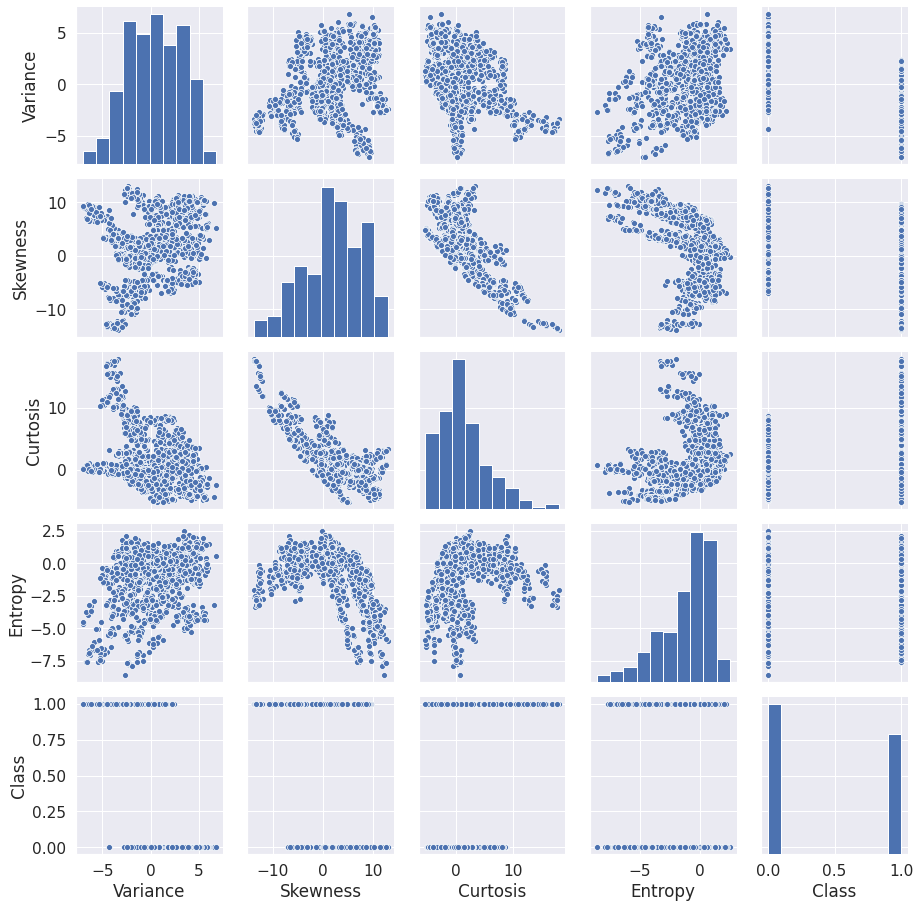

In [0]:
sns.pairplot(dataset)

We observe that skewness is inversely proportional to the entropy and curtosis.
Entropy and variance seem to have a direct proportion trend.


We see that with just one attribute and the target variable, we cannot correctly predict the class - (eg: see the overlap region around 0 for variance attribute and that from 0 to 10 for curtosis).

Now let us visualise how the attributes vary with respect to each other to observe a trend on how the class labels vary.

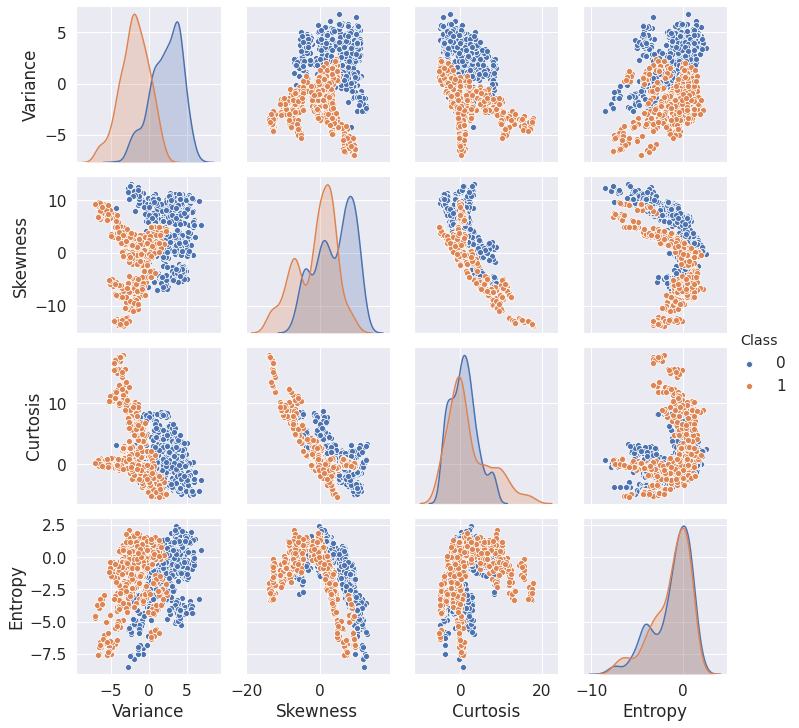

In [0]:
sns.pairplot(dataset,hue='Class')

Here we observe some interesting boundaries between the two classes, especially the skewness vs variance plot where there seems to be a curved boundary.
On observing skewness trends, we see that a low skewness value often corresponds to the 0 (forged) label.

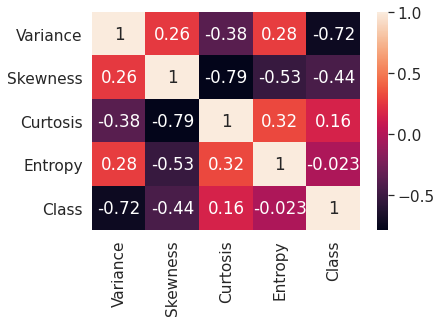

In [0]:
corr = dataset.corr()
sns.heatmap(corr,annot=True)

Since most of the features are "unique", ie, not having a high correlation with another - we shall retain all features and train our classifiers.

# Data Split
We shall now prepare the data by splitting it into the train and test set.

For this purpose, we shall separate the target attribute ('Class') from the other attributes.

In [0]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

We shall set aside 20% of the dataset for testing and remaining 80% can be used for training our classifier.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Decision Tree Classifier
Now we can instantiate the classifer from the *sklearn.tree package*.

In [0]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now we shall use the test set for predicting the target labels.

In [0]:
y_pred = tree_classifier.predict(X_test)

## Evaluating the classifer:

We shall generate the classification report to calculate measures like precision, recall, f1-score etc.

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.54      0.56       156
           1       0.43      0.45      0.44       119

    accuracy                           0.51       275
   macro avg       0.50      0.50      0.50       275
weighted avg       0.51      0.51      0.51       275



We can see that the precision and recall are extremely high for both categories, forged and genuine bank notes.

Let us now generate the confusion matrix:

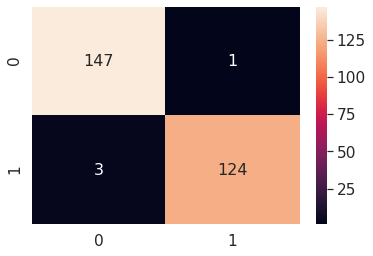

In [0]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt="d") # font size

plt.show()


We see that almost all records are classified correctly.

Let us take a look at the ROC-AUC curve for a better understanding of the classifier:

In [0]:
y_proba_tree = cross_val_predict( tree_classifier, X_train, y_train, cv=3, method="predict_proba")
y_scores_tree = y_proba_tree[:,1] 
fpr_tree, tpr_tree, threshold_tree = roc_curve(y_train, y_scores_tree)
roc_auc_score_tree = roc_auc_score(y_train, y_scores_tree)

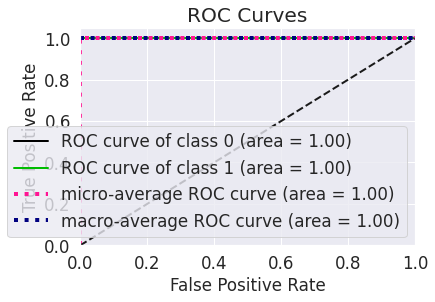

In [0]:
y_true = y_train
y_probas = tree_classifier.predict_proba(X_train)
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

In [0]:
roc_auc_score_tree

0.977492555772889

The ROC-AUC score is on the higher side, indicating good performance of the classifier!

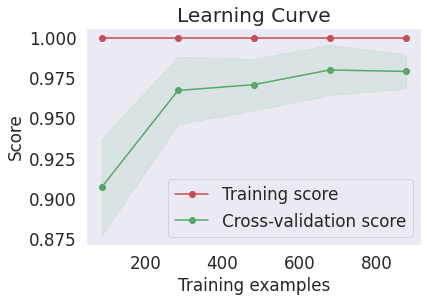

In [0]:
skplt.estimators.plot_learning_curve(tree_classifier, X_train, y_train)
plt.show()

The cross-validation score increasing tells us that the model is generalising well!

## Visualising the classifier:

In [0]:
features = dataset.columns
features = features.drop('Class')
features

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

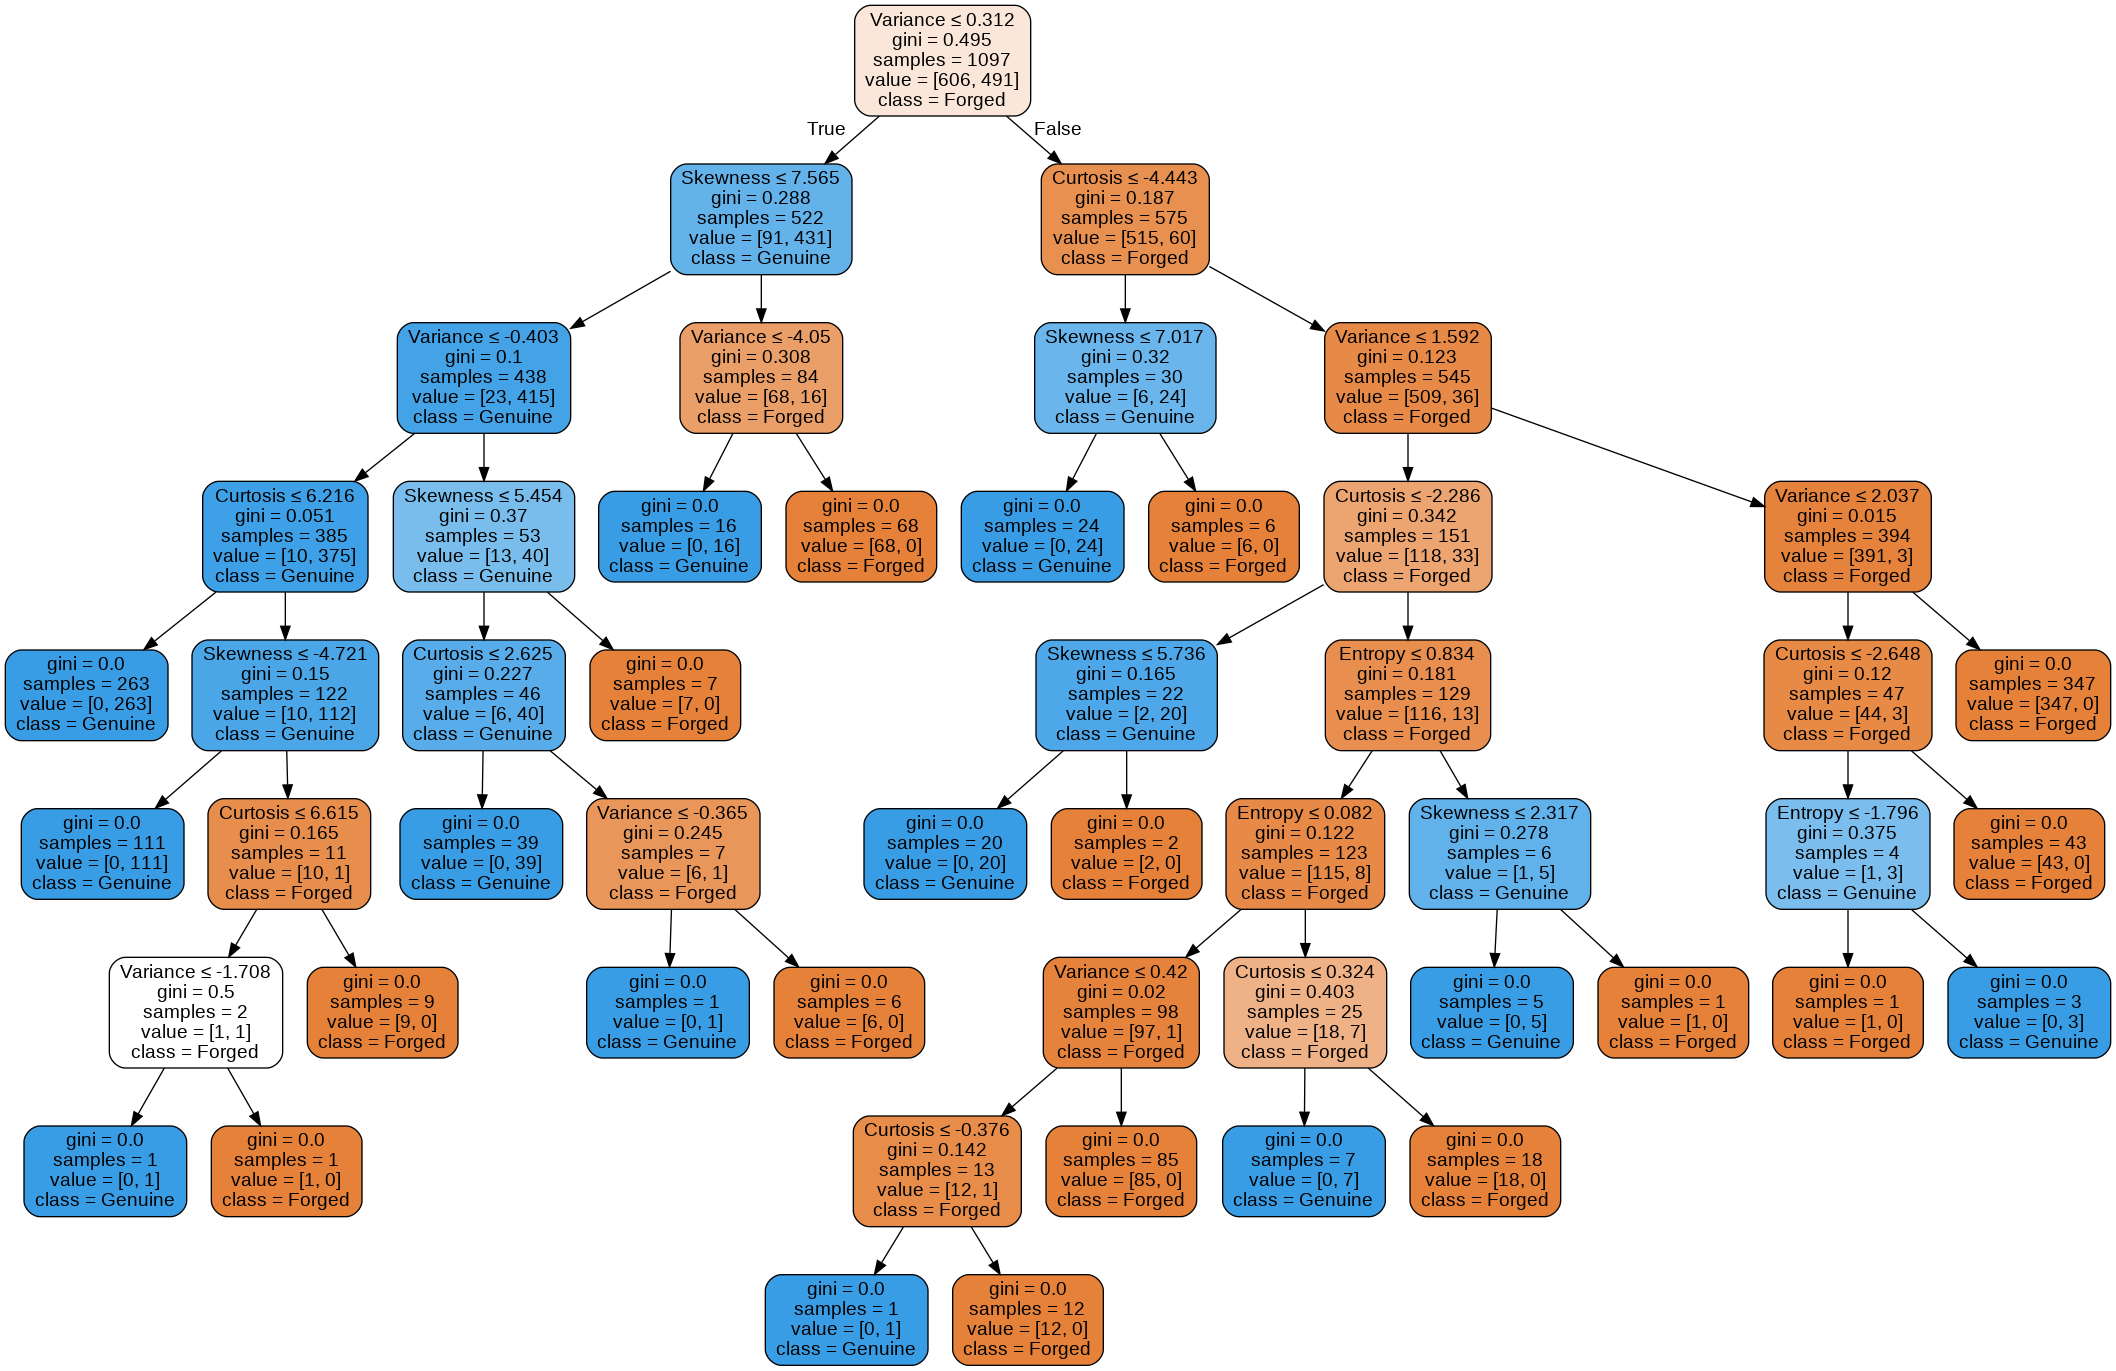

In [0]:
dot_data = StringIO()
export_graphviz(tree_classifier, 
 out_file=dot_data, 
 class_names=['Forged','Genuine'], # the target names.
 feature_names= features , # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# Bayes Classifier

In [0]:
from sklearn.naive_bayes import GaussianNB

Instantiating and training the Gaussian classifier:

In [0]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Now we shall use the classifier on the test set and obtain the predicted labels.

In [0]:
y_pred = gnb.predict(X_test)

## Evaluating the classifier:
We shall look at measures like precision and recall to evaluate the classifier:

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       148
           1       0.80      0.71      0.75       127

    accuracy                           0.79       275
   macro avg       0.79      0.78      0.78       275
weighted avg       0.79      0.79      0.78       275



We can see that the precision and recall are not as good as our decision tree classifier.

Let us now generate the confusion matrix:

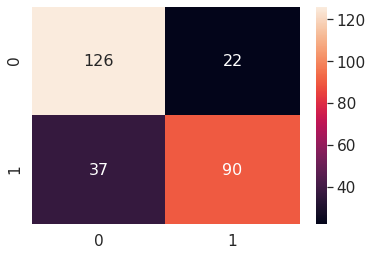

In [0]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt="d") # font size

plt.show()


We see that most records are identified correctly.

Let us take a look at the ROC-AUC curve for a better understanding of the classifier:

In [0]:
y_proba_tree = cross_val_predict( gnb, X_train, y_train, cv=3, method="predict_proba")
y_scores_tree = y_proba_tree[:,1] 
fpr_tree, tpr_tree, threshold_tree = roc_curve(y_train, y_scores_tree)
roc_auc_score_tree = roc_auc_score(y_train, y_scores_tree)

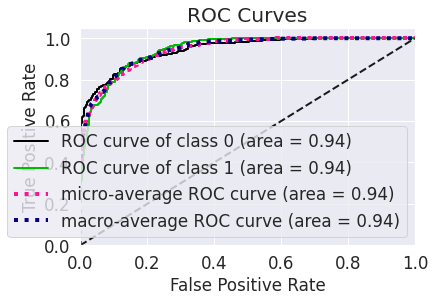

In [0]:
y_true = y_train
y_probas = gnb.predict_proba(X_train)
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

In [0]:
roc_auc_score_tree

0.9408393996222433

The ROC-AUC score is on the higher side, indicating good performance of the classifier!

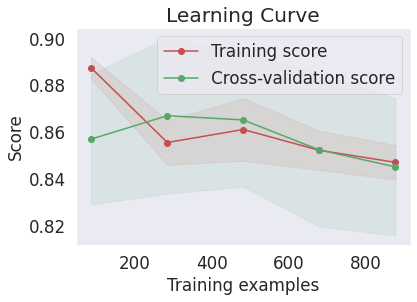

In [0]:
skplt.estimators.plot_learning_curve(gnb, X_train, y_train)
plt.show()

This model seems to be generalising **better** than the decision tree classifier! Though the classification report of the decision tree may be better than that of the bayes classifier, we see that the training and validation score of the bayes classifier approach each other - signifying that this model will be more generic and perform better with unseen real data!

# Conclusion:
Both classifier performed well on the dataset, with the Bayes classifier generalising better. In conclusion, the take-away is that we need to evaluate our classifier on different scores in order to truly understand its performance. Based on the need of the application, we can further tune the model - eg to increase precision with the trade-off of recall, or vice-versa.